<a href="https://colab.research.google.com/github/Pkanala0/HR-Analysis-using-python/blob/main/hr_data_analysis_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***HR DATA ANALYSIS USING PYTHON***

In this project, we will be looking at the dataset to see if we can glean useful insights by the means of Data Analysis and Data Visualization. Briefly, we will be following the below steps: 

* Load the data.
* Display useful statistics.
* Build generic functions to detect nulls and missing values.
* Handle missing values.
* Make Visualizations to help us understand the data efficiently.

# New Section

# Load libraries

In [ ]:
import os
import numpy as np 
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import pandas as pd 
pd.options.mode.chained_assignment = None  # default='warn'



# Load Dataset

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')



# Display rows
print(df_train.head(5))
print('======================')
print(df_test.head(5))

   employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1 

# Display summary statistics


In [ ]:
# List the column names
print(list(df_train.columns))

['employee_id', 'department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']


In [ ]:
# Describe the data
print(df_train.describe())

        employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       54808.000000   54808.000000  54808.000000        54808.000000   
mean            5.865512       0.351974      0.023172           63.386750   
std             4.265094       0.477590      0.150450           13.371559   
min    

It seems like much of the data has discrete values (0 or 1) in terms of numerical columns. Columns like KPIs_met ranges in terms of percent values between 0 - 1. Let's look into the categorical columns

In [ ]:
# Select categorical columns
print(df_train.select_dtypes(include = ['object']))

              department     region         education gender  \
0      Sales & Marketing   region_7  Master's & above      f   
1             Operations  region_22        Bachelor's      m   
2      Sales & Marketing  region_19        Bachelor's      m   
3      Sales & Marketing  region_23        Bachelor's      m   
4             Technology  region_26        Bachelor's      m   
...                  ...        ...               ...    ...   
54803         Technology  region_14        Bachelor's      m   
54804         Operations  region_27  Master's & above      f   
54805          Analytics   region_1        Bachelor's      m   
54806  Sales & Marketing   region_9               NaN      m   
54807                 HR  region_22        Bachelor's      m   

      recruitment_channel  
0                sourcing  
1                   other  
2                sourcing  
3                   other  
4                   other  
...                   ...  
54803            sourcing  
54804  

At this point looking at rhe categorical columns, *Region* can be removed (unless we find something that refutes this decision), *department*, *education* and *recruitment_channel* can be encoded either via LabelEncoding or OneHotEncoding

In [ ]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB
None


# Investigating Missing Values

In [ ]:
# Generic function to calculate missing values, zero values
def calcMissingValues(df):
    '''    
        This function is used to calculate : zero values, missing values, NA and returns a dataframe with the above calculated
        values. 
        
        Input: Dataframe
        Output: Returns a dataframe
    '''
    
    # Calc zero vals
    zero_vals = (df == 0.0).astype(int).sum(axis = 0)
    
    # Calc missing vals
    missing_vals = df.isnull().sum()
    
    # Calc missing value percent
    missing_val_percent = round((missing_vals / len(df)) * 100.0, 2)
    
    df_missing_stat = pd.concat([zero_vals , missing_vals , missing_val_percent] , axis = 1)
    
    df_missing_stat = df_missing_stat.rename(columns = {0: 'zero_vals', 1: 'missing_vals', 2: '%_missing_vals'})
    
    df_missing_stat['data_types'] = df.dtypes
    
    print(df_missing_stat)
    
    return df_missing_stat

In [ ]:
df_missing_stat = calcMissingValues(df_train)

                      zero_vals  missing_vals  %_missing_vals data_types
employee_id                   0             0            0.00      int64
department                    0             0            0.00     object
region                        0             0            0.00     object
education                     0          2409            4.40     object
gender                        0             0            0.00     object
recruitment_channel           0             0            0.00     object
no_of_trainings               0             0            0.00      int64
age                           0             0            0.00      int64
previous_year_rating          0          4124            7.52    float64
length_of_service             0             0            0.00      int64
KPIs_met >80%             35517             0            0.00      int64
awards_won?               53538             0            0.00      int64
avg_training_score            0             0      

# Visualize Missing values

We will use the ***missingno*** library to visualize the missing values in our dataset. Visualization provides some intuition and a possible pattern that can be useful to interpret the data in a better way.

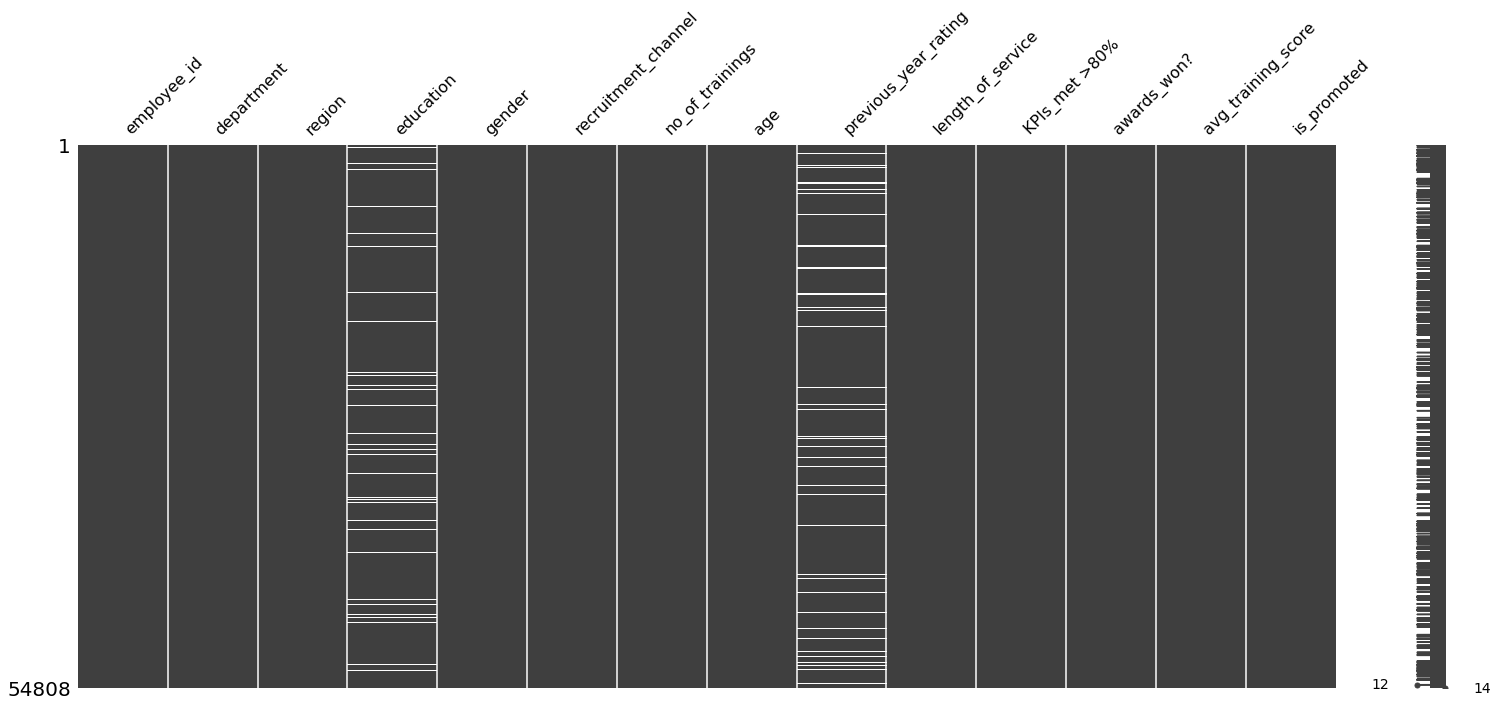

In [ ]:
# plot a missing value matrix
msno.matrix(df_train)
plt.show()

*previous_year_rating* has missing values and would be interesting to see if the values were not recorded or they did not exist which may happen in cases where *length_of_service* is less than 1 (The employee either is trainee or has joined relatively new). Both these columns must be observed before handling the missing values.

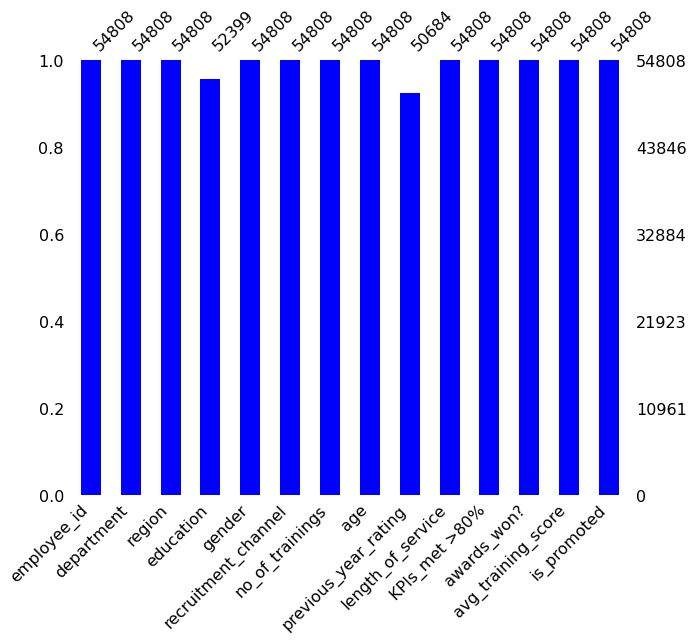

In [ ]:
# Plotting a bar graph
msno.bar(df_train , figsize = (10 , 8) , color = 'blue')
plt.show()

The values to the right side gives the row numbers, and the left gives the proportion of rows to the total. The values at the top of the bar gives the actual number of non-missing rows.

In [ ]:
# Observe null records to see if there is any corresponding pattern in other columns
train_copy = df_train.copy()
print(train_copy[train_copy['previous_year_rating'].isnull()]['length_of_service'])

print()

print(train_copy[train_copy.filter(items = ['previous_year_rating']).isnull().any(axis = 1)]['length_of_service'])

10       1
23       1
29       1
56       1
58       1
        ..
54703    1
54734    1
54746    1
54773    1
54801    1
Name: length_of_service, Length: 4124, dtype: int64

10       1
23       1
29       1
56       1
58       1
        ..
54703    1
54734    1
54746    1
54773    1
54801    1
Name: length_of_service, Length: 4124, dtype: int64


Both lines of code give the same result and our initial guess was correct whenever there is a null value in *previous_year_rating* the *length_of_service* column has a value of 1. This rules out deleting the rows having nulls. Let's again look at the info statistics to see if we can impute reasonably.

In [ ]:
print(df_train.describe())

        employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       54808.000000   54808.000000  54808.000000        54808.000000   
mean            5.865512       0.351974      0.023172           63.386750   
std             4.265094       0.477590      0.150450           13.371559   
min    

Since the mean value of *previous_year_rating* is 3.3, we can impute the missing values with the mean as it makes sense to give an average rating to employees than a ratin of 1 which is not realistic.

In [ ]:
# Replace the missing values for previous_year_rating with mean
df_train['previous_year_rating'].fillna(df_train['previous_year_rating'].mean() , inplace = True)

In [ ]:
print(df_train['education'].value_counts())

# Get the mode of the feature education
print()
print('Mode: ' , df_train['education'].mode()[0])


Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

Mode:  Bachelor's


For education, we see Bachelors and Masters being the most common value and we can impute with Bachelors for the missing value as it makes a reasonable estimate and it also is the mode (statistics)

In [ ]:
# Replace the missing values for education with mode
df_train['education'].fillna(df_train['education'].mode()[0] , inplace = True)

# Check for missing values
df_missing_stat = calcMissingValues(df_train)

                      zero_vals  missing_vals  %_missing_vals data_types
employee_id                   0             0             0.0      int64
department                    0             0             0.0     object
region                        0             0             0.0     object
education                     0             0             0.0     object
gender                        0             0             0.0     object
recruitment_channel           0             0             0.0     object
no_of_trainings               0             0             0.0      int64
age                           0             0             0.0      int64
previous_year_rating          0             0             0.0    float64
length_of_service             0             0             0.0      int64
KPIs_met >80%             35517             0             0.0      int64
awards_won?               53538             0             0.0      int64
avg_training_score            0             0      

# EDA and Data Visualization

We will now look into data analysis and visualize some of the relationships between features to get more insights about the data.

We will do a pairplot analysis to see what are the reltionships between different variables and how it influences the target variable. In datasets having more features, pairplots are quite useful in revealing patterns that help in subsequent analysis.

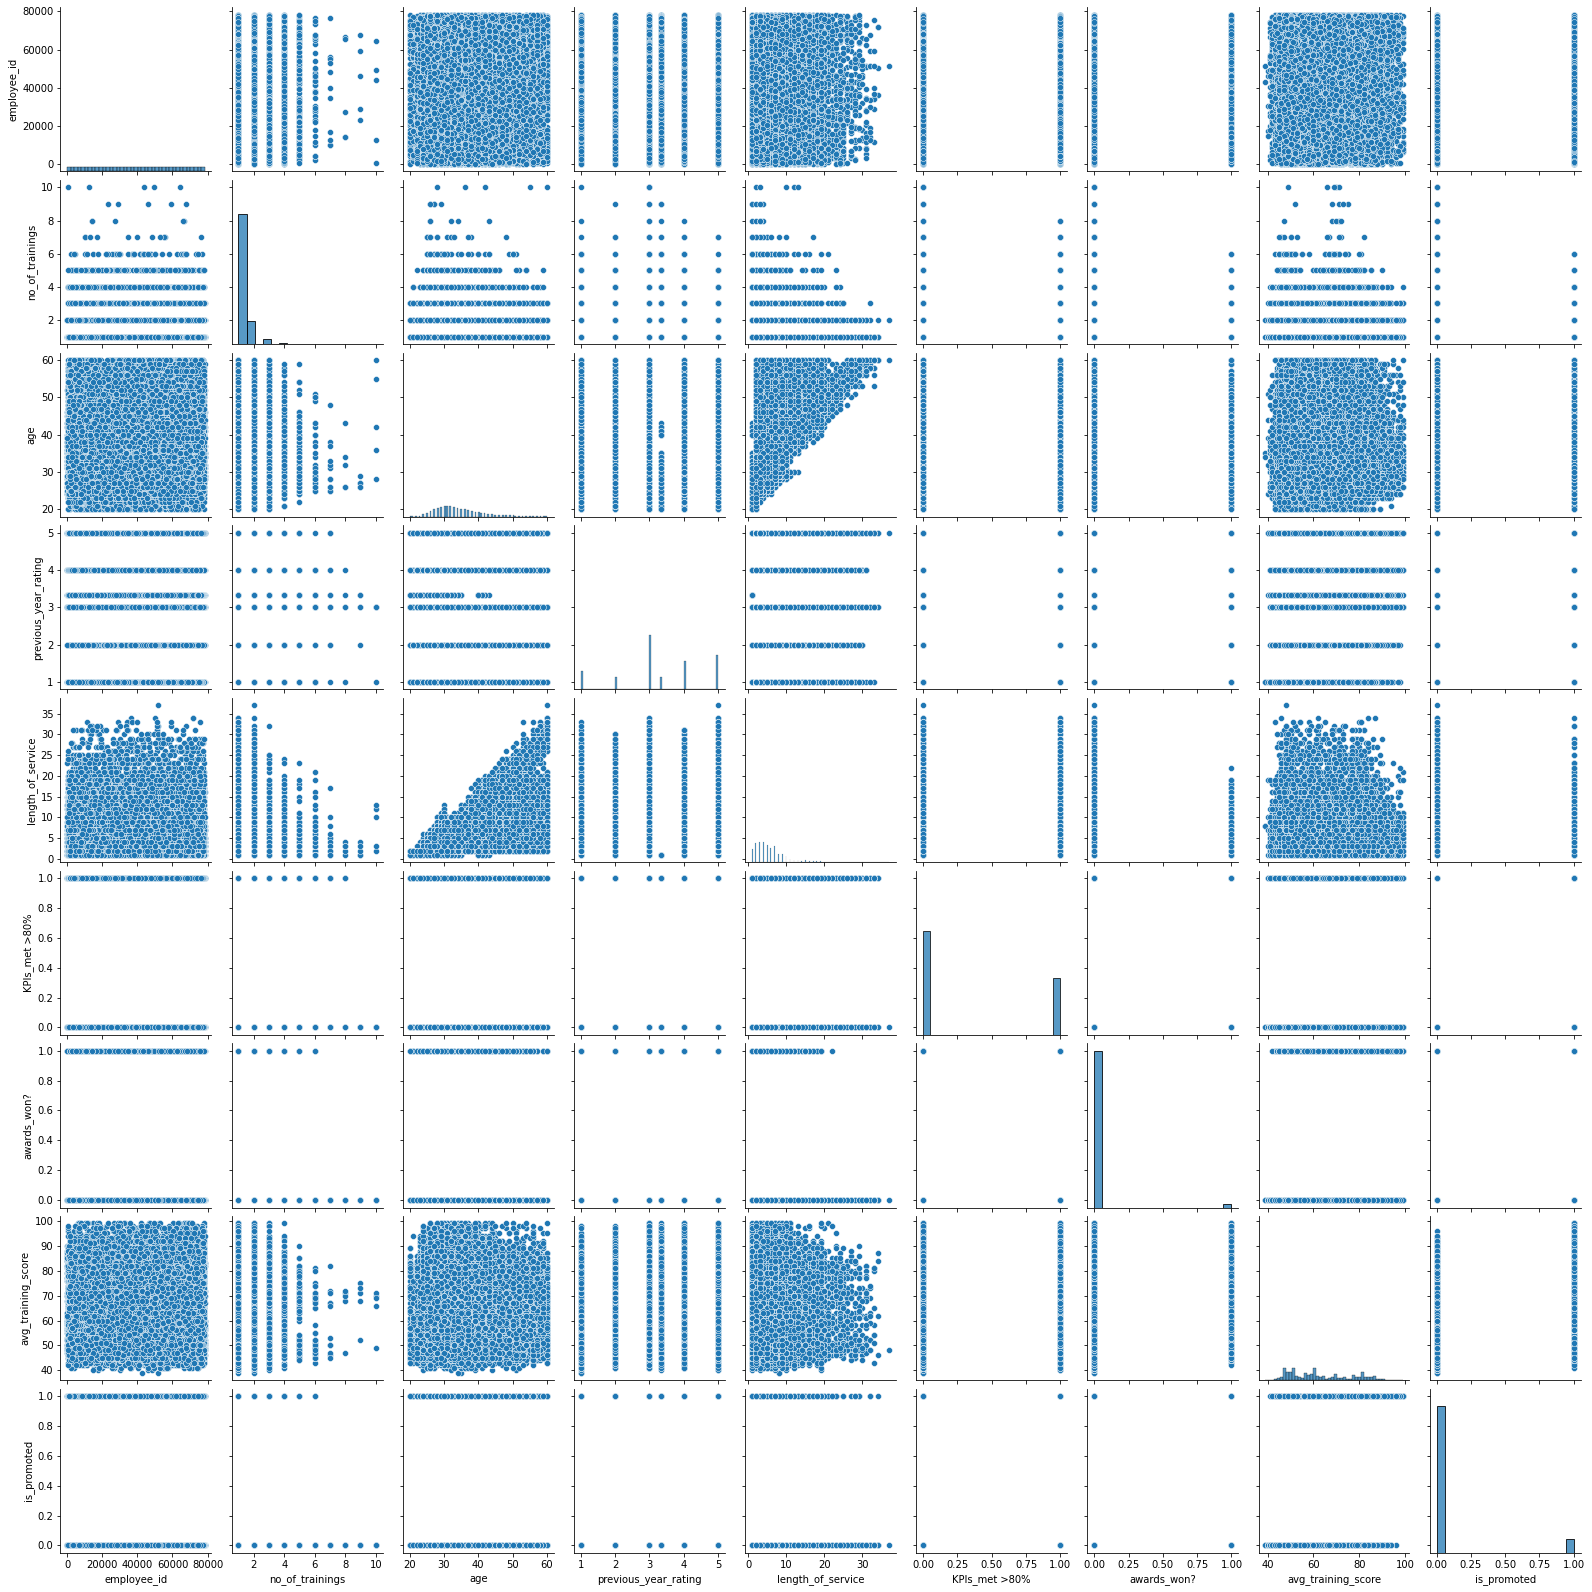

In [ ]:
sns.pairplot(df_train)
plt.show()

The employee_id column can be safely dropped

<Figure size 864x576 with 0 Axes>

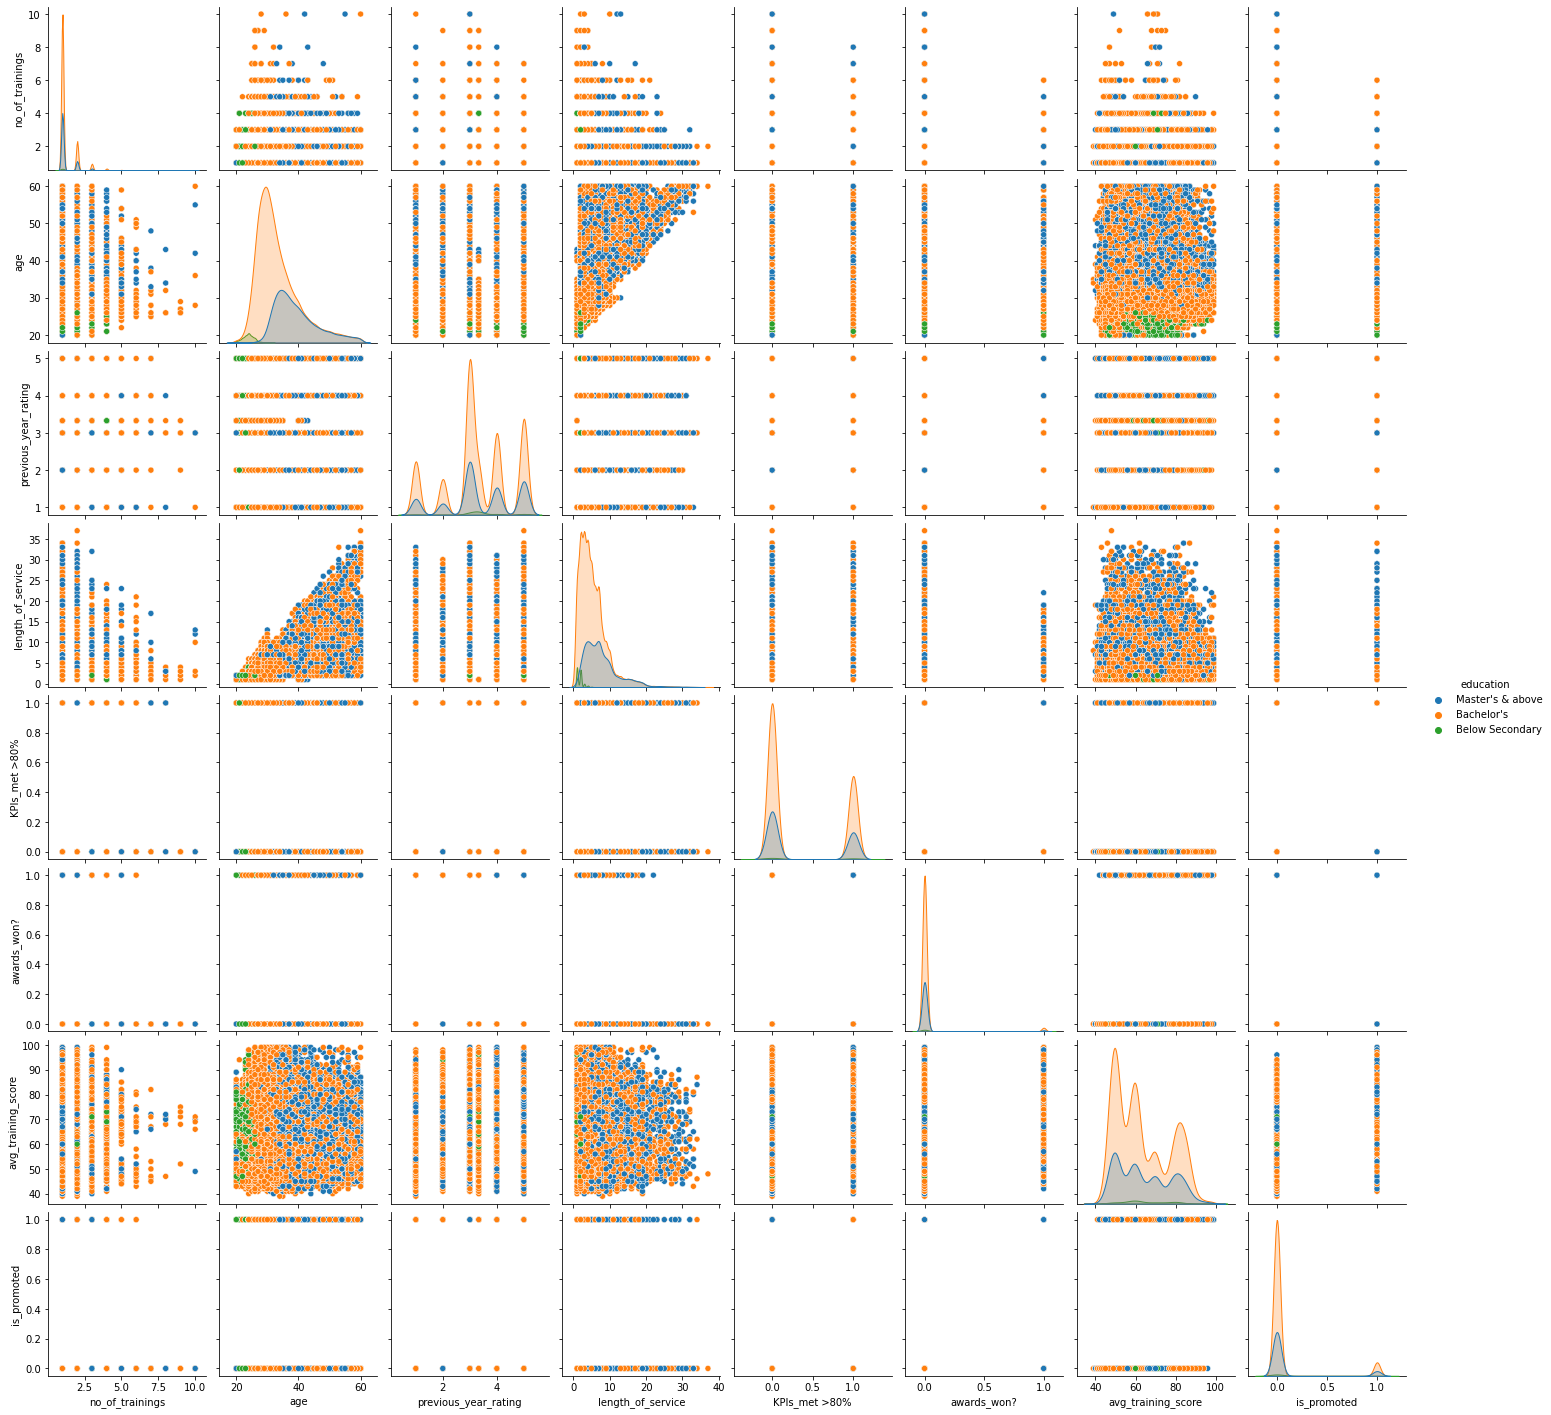

In [ ]:
# Create a copy of the train dataset
df_x = df_train.copy()

df_x.drop('employee_id' , inplace = True , axis = 1)

# Let's make a pairplot with employee_id being dropped

# Lets visualize from the perspective of education degree
plt.figure(figsize = (12 , 8))
sns.pairplot(df_x , hue = 'education')
plt.show()

Some observations from the pairplot
(Stacked bar graphs do not serve any purpose when you are analysing a numerical value against another numerical value!! They are useful when there is a categorical variable. Otherwise the analysis can be misleading)

* Lesser no_of_trainings has more promotions (Does quality over quanity matter here?)
* Promotions are provided irrespective of the employee age
* All types of previous_year_ratings have received promotions, so there is no explicit pattern or strong relationship to discern here. Higher ratings have more number of promotions.
* Similarly age too does not play a role in promotions as in any company people receive promotions across different age groups.
* Length_of_service has a positive linear relationship with age which is obviously true!.


   previous_year_rating  is_promoted
0                     1           88
1                     2          181
2                     3         1355
3                     3          339
4                     4          784
5                     5         1921


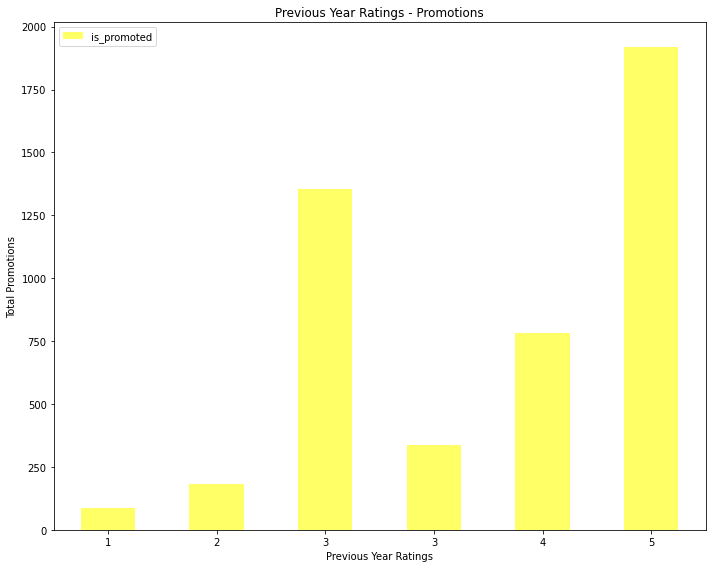

In [ ]:
# Let's compare some of the features against the target variable
prev_yr_rating = df_x.groupby(['previous_year_rating'] , as_index = False)['is_promoted'].sum()

prev_yr_rating['previous_year_rating'] = prev_yr_rating['previous_year_rating'].round().astype(int)

print(prev_yr_rating)

'''

VALID LEGEND LOCATIONS

best
upper right
upper left
lower left
lower right
right
center left
center right
lower center
upper center
center


'''


prev_yr_rating.plot(kind = 'bar', x = 'previous_year_rating' , y = 'is_promoted', color = 'yellow' , alpha = 0.6, figsize = (10 , 8) , rot = 0)
plt.xlabel('Previous Year Ratings')
plt.ylabel('Total Promotions')
plt.title('Previous Year Ratings - Promotions')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

          education  is_promoted
0        Bachelor's         3130
1   Below Secondary           67
2  Master's & above         1471


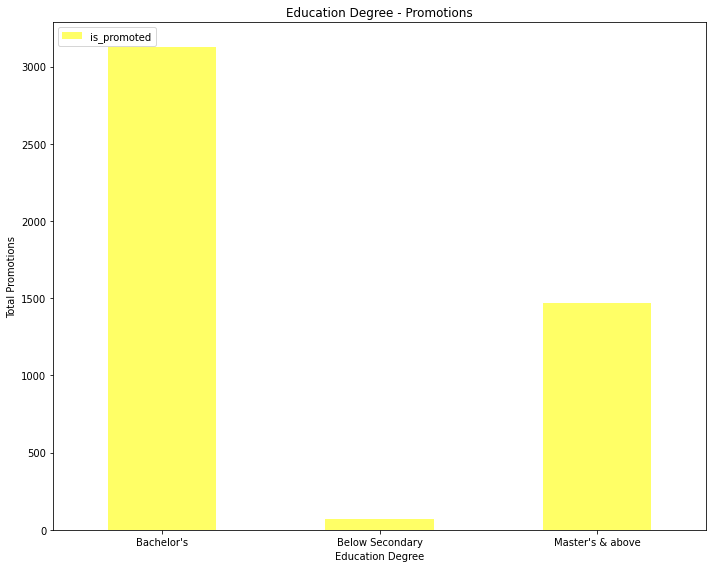

In [ ]:
# Compare education and total promotions
education_promotions = df_x.groupby(['education'], as_index = False)['is_promoted'].sum()

print(education_promotions)

education_promotions.plot(kind = 'bar', x = 'education' , y = 'is_promoted', color = 'yellow' , alpha = 0.6, figsize = (10 , 8) , rot = 0)
plt.xlabel('Education Degree')
plt.ylabel('Total Promotions')
plt.title('Education Degree - Promotions')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In general, a Bachelors degree is a necessary to be considered for a promotion and the count is also boosted by the handling of missing values.

education
Bachelor's          39078
Below Secondary       805
Master's & above    14925
dtype: int64
[39078, 805, 14925]


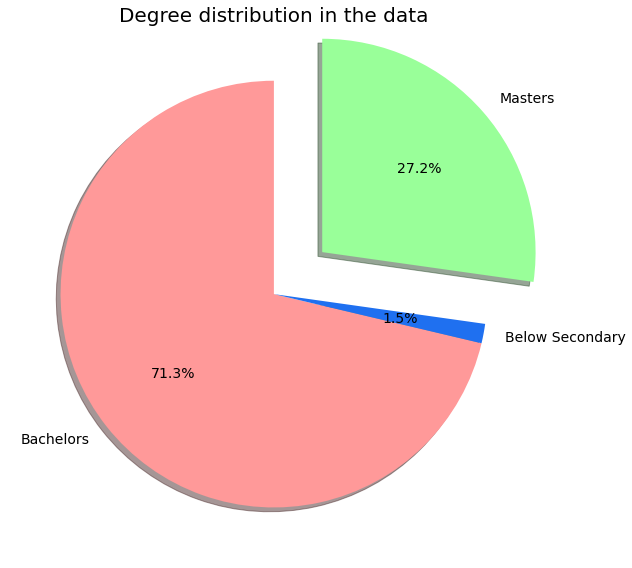

In [ ]:
# Overall proportion of different degrees

# Pie Chart ref: https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
print(df_x.groupby(['education']).size())

sizes = list(df_x.groupby(['education']).size())

print(sizes)

labels = ['Bachelors' , 'Below Secondary', 'Masters']
colors = ['#ff9999','#1f70f0','#99ff99']
pie_explode = [0 , 0 , 0.3]

plt.figure(figsize = (10 , 8))
plt.pie(sizes , labels = labels , explode = pie_explode , colors = colors , shadow = True, startangle = 90 , textprops={'fontsize': 14} , autopct = '%.1f%%')
plt.ylabel('')
plt.title('Degree distribution in the data' , fontsize = 20)
plt.tight_layout()
plt.show()

['sourcing' 'other' 'referred']
other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64
[30446, 23220, 1142]


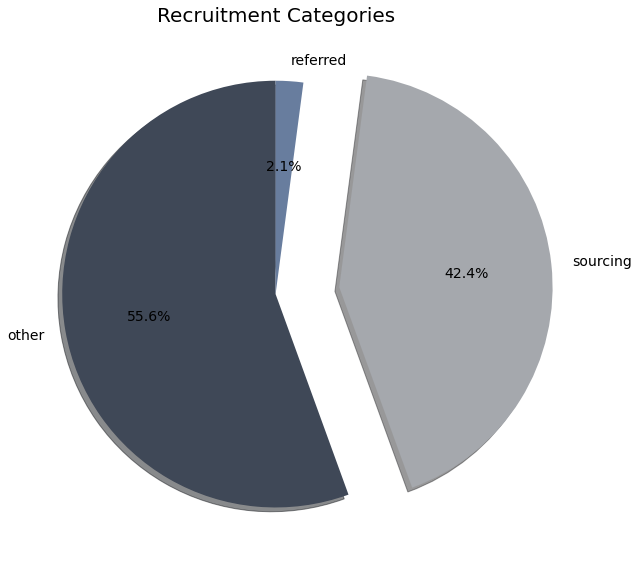

In [ ]:
# Recruitment channel - employment
# Pie Chart ref: https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

# Unique values for the type of recruitment followed
print(df_x['recruitment_channel'].unique())

print(df_x['recruitment_channel'].value_counts())
recruitment_categories = list(df_x['recruitment_channel'].value_counts())

print(recruitment_categories)

labels = ['other' , 'sourcing', 'referred']
colors = ['#3f4857','#a5a8ad','#687d9e']
pie_explode = [0 , 0.3 , 0]

plt.figure(figsize = (10 , 8))
plt.pie(recruitment_categories , labels = labels , explode = pie_explode , colors = colors , shadow = True, startangle = 90 , textprops = {'fontsize': 14} , autopct = '%.1f%%')
plt.ylabel('')
plt.title('Recruitment Categories' , fontsize = 20)
plt.tight_layout()
plt.show()

In a similar vein, the other features could be visualized either as a donut chart or bar graphs.

# Conclusion

This project includes Data Analysis, EDA (as offered by the dataset) and Data Visualization. Building models on top of this dataset gives a detailed analysis and handling of missing values should be fairly simple.